In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Yeast\Yeast_AL_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22
...,...,...,...,...,...,...,...,...
1479,0.82,0.63,0.47,0.18,0.5,0.0,0.50,0.22
1480,0.35,0.29,0.46,0.14,0.5,0.0,0.54,0.66
1481,0.41,0.47,0.50,0.14,0.5,0.0,0.53,0.37
1482,0.51,0.45,0.62,0.25,0.5,0.0,0.59,0.22


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	42
float64		column 2	14
float64		column 3	42
float64		column 4	0
float64		column 5	7
float64		column 6	0
float64		column 7	0
float64		column 8	7


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,1442.000000,1470.000000,1442.000000,1484.000000,1477.000000,1484.000000,1484.000000,1477.000000
mean,0.499993,0.500000,0.500014,0.261186,0.504739,0.007500,0.499885,0.276405
std,0.137494,0.123722,0.087023,0.137098,0.048464,0.075683,0.057797,0.106627
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.480000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.577500,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


<AxesSubplot:>

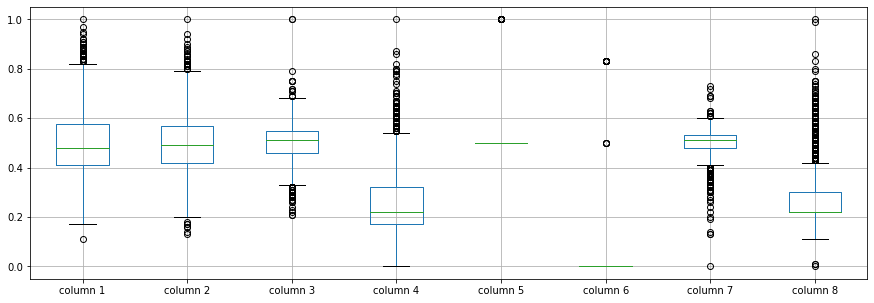

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    0.499993
column 2    0.500000
column 3    0.500014
column 4    0.261186
column 5    0.504739
column 6    0.007500
column 7    0.499885
column 8    0.276405
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.584598,-0.166277,0.156052,0.066131,0.005765,0.069760,-0.137104
column 2,0.584598,1.000000,-0.273503,0.139389,0.061162,0.000340,0.093217,-0.107955
column 3,-0.166277,-0.273503,1.000000,0.066027,-0.008533,0.009499,-0.183838,-0.018595
column 4,0.156052,0.139389,0.066027,1.000000,-0.005925,-0.009040,-0.103591,-0.053492
column 5,0.066131,0.061162,-0.008533,-0.005925,1.000000,-0.009721,0.043785,0.002732
column 6,0.005765,0.000340,0.009499,-0.009040,-0.009721,1.000000,0.020900,-0.035890
column 7,0.069760,0.093217,-0.183838,-0.103591,0.043785,0.020900,1.000000,0.091445
column 8,-0.137104,-0.107955,-0.018595,-0.053492,0.002732,-0.035890,0.091445,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [10]:
imputer = md.Midas(layer_structure = [8,8+65,8+65+65,8+65+65+65,8+65+65+65+65,8+65+65+65+65+65,8+65+65+65+65+65+65,8+65+65+65+65+65,8+65+65+65+65,8+65+65+65,8+65+65,8+65,8], vae_layer = False, seed = 8)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 2.812098718207815
Epoch: 1 , loss: 2.374903891397559
Epoch: 2 , loss: 2.2032459378242493
Epoch: 3 , loss: 2.0655256768931514
Epoch: 4 , loss: 1.932828101127044
Epoch: 5 , loss: 1.8597309278405232
Epoch: 6 , loss: 1.780406065609144
Epoch: 7 , loss: 1.704176892404971
Epoch: 8 , loss: 1.6124775461528613
Epoch: 9 , loss: 1.5807232118171195
Epoch: 10 , loss: 1.5357085958771084
Epoch: 11 , loss: 1.475563846204592
Epoch: 12 , loss: 1.445402214060659
Epoch: 13 , loss: 1.399726020253223
Epoch: 14 , loss: 1.3727021463539288
Epoch: 15 , loss: 1.3480839742266613
Epoch: 16 , loss: 1.3103489778611972
Epoch: 17 , loss: 1.3053998940664788
Epoch: 18 , loss: 1.2642332730085954
Epoch: 19 , loss: 1.229815220055373
Epoch: 20 , loss: 1.2266651780708977
Epoch: 21 , loss: 1.2178835408843083
Epoch: 22 , loss: 1.207989764602288
Epoch: 23 , loss: 1.166682582186616
Epoch: 24 , loss: 1.1663532742987508
Epoch: 25 , loss: 1.147972328

In [11]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(1484, 8)

In [12]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    0.43
column 2    0.44
column 3    0.48
column 4    0.22
column 5    0.50
column 6    0.00
column 7    0.51
column 8    0.22
Name: 21, dtype: float64

In [13]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Yeast.xlsx', header=None,names=column_names)

In [14]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [15]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [16]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [17]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(1.5713288028368833, 46.90414374018569)

In [18]:
NRMS=numerator/denominator
NRMS


0.03350085253748335

In [19]:
new_df.iloc[66,:]

column 1    0.46
column 2    0.49
column 3    0.58
column 4    0.23
column 5    0.50
column 6    0.00
column 7    0.44
column 8    0.22
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22
...,...,...,...,...,...,...,...,...
1479,0.82,0.63,0.47,0.18,0.5,0.0,0.50,0.22
1480,0.35,0.29,0.46,0.14,0.5,0.0,0.54,0.66
1481,0.41,0.47,0.50,0.14,0.5,0.0,0.53,0.37
1482,0.51,0.45,0.62,0.25,0.5,0.0,0.59,0.22


In [21]:
imputations[-1].to_excel("Yeast_AL_1(imp).xlsx", index=False, header=False)